Artificial neural networks are models inspired by networks of biological neurons that are made up of artificial neurons that individually perform various computations.

Topics:

- Overview
- Implementation
- Tuning

# Overview

One simple ANN architecture is the **Perceptron**, which is made up of a single layer of **threshold logic units (TLUs)**. A TLU computes a weighted sum of inputs and applies a step function to determine an output.

*Equation 1: Common step functions*

\begin{equation*}
\text{heaviside}(z) = \begin{cases}
0 \;\text{ if }\; z \lt t\\
1 \;\text{ if }\; z \geq t\\
\end{cases}
\end{equation*}

\begin{equation*}
\text{sgn}(z) = \begin{cases}\begin{aligned}
-1 \;\text{ if }\; z \lt t\\
0 \;\text{ if }\; z = t\\
1 \;\text{ if }\; z \geq t\\
\end{aligned}\end{cases}
\end{equation*}

where $t$ is some numeric threshold.

Each TLU in a Perceptron is connected to all of the inputs in the input layer, classifying the Perceptron as a **fully connected layer**. Constant inputs are referred to as **bias neurons**.

*Equation 2: Computing fully connected layer outputs*

\begin{equation*}
h_\mathbf{W},\mathbf{b}(\mathbf{X}) = \phi(\mathbf{XW}+\mathbf{b})
\end{equation*}

- $\mathbf{X}$ is the matrix of input features
- $\mathbf{W}$ is the vector of non-bias connectionn weights
- $\mathbf{b}$ is the vector of bias connection weights
- $\phi$ is the activation function (such as a step function)

Training a Perceptron involves adjusting the weights after making predictions on each training instance to reduce the error.

*Equation 3: Perceptron learning rule*

\begin{equation*}
w_{i,j}^{\text{next step}} = w_{i,j} + \eta  \bigl(y_j - \hat{y}_j\bigr)x_i
\end{equation*}

- $w_{i,j}$ is the connection weight between the $i^{\text{th}}$ input neuron and the $j^{\text{th}}$ output neuron
- $x_i$ is the $i^{\text{th}}$ input value of the current training instance
- $\hat{y}_j$ is the output of the $j^{\text{th}}$ output neuron for the current training instance
- $y_j$ is the target output of the $j^{\text{th}}$ output neuron for the current training instance
- $\eta$ is the learning rate

In [1]:
# Perceptron demonstration with sklearn
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()

# Get petal length and width
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [3]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

A Multilayer Perceptron (MLP) is composed of one input layer, one or more hidden layers containing TLUs, and an output layer of TLUs. An artificial neural network that contains several hidden layers is considered a deep neural network (DNN).

The backpropagation algorithm is a common training algorithm for layered networks. It works by passing batches of data through the layers and preserving the intermediate results, computing the output error, determining how each intermediate result contributed to the error in the following layer, and performing Gradient Descent to tweak each weight to reduce the error at each step. Each full pass of a batch is referred to as an epoch.

Since the step function has no derivative, it is incompatible with Gradient Descent, and other activation functions must be used. Some options include:

- The logistic  sigmoid function: $\sigma(z) = 1/(1+\text{exp}(-z))$
- The hyperbolic tangent function: $tanh(z) = 2\sigma(2z)-1$
- The rectified linear unit function (ReLU): $\text{ReLU}(z) = max(0, z)$

## Implementation

In [2]:
import tensorflow as tf
from tensorflow import keras

# Use Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist

# Split into test and train sets
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [4]:
# Normalize, separate validation and train sets
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
# Establish class names
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

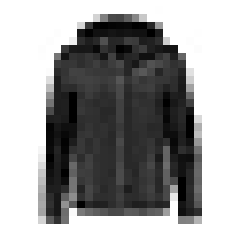

In [6]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [7]:
class_names[y_train[0]]

'Coat'

In [8]:
# Clear existing session
keras.backend.clear_session()

# Sequential model, single stack of layers connected sequentially
model = keras.models.Sequential()

# Flatten each input to a 1D array
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# Two dense hidden layers, relu as it's usually the default
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))

# Dense output layer with one output per class, softmax for exclusive classification
model.add(keras.layers.Dense(10, activation='softmax'))

In [9]:
keras.backend.clear_session()

# Alternatively, initialize the model with list of layers
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [10]:
# View the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Access the list of layers
model.layers

In [12]:
# Access layers by name or index
model.get_layer('dense') is model.layers[1]

True

In [13]:
# Access weights and biases
weights, biases = model.get_layer('dense').get_weights()
weights, biases

(array([[-0.00023267, -0.02242439, -0.03643226, ...,  0.0466231 ,
          0.00348783,  0.04005018],
        [-0.06162835,  0.03964276,  0.03694639, ...,  0.07041022,
          0.041781  , -0.06971791],
        [ 0.03926212,  0.06389691,  0.03737323, ...,  0.05727755,
          0.05293128,  0.01367906],
        ...,
        [ 0.00638623,  0.00300123,  0.00422489, ..., -0.0642083 ,
         -0.03030301, -0.02549198],
        [ 0.03974923,  0.07265262, -0.01564472, ...,  0.02200408,
          0.01381736,  0.05074489],
        [-0.00818192,  0.03355133,  0.05846569, ..., -0.0644336 ,
          0.03404753, -0.0319648 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [14]:
# Compile the model to specify loss function and optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

Note: sparse_categorical_crossentropy is used for exclusive classification. If one-hot vectors are desired, categorical_crossentropy should be used instead.

In [15]:
# Training the model returns a History object
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 8s 149us/sample - loss: 0.7109 - accuracy: 0.7676 - val_loss: 0.4978 - val_accuracy: 0.8360
Epoch 2/30
55000/55000 [==============================] - 7s 133us/sample - loss: 0.4863 - accuracy: 0.8321 - val_loss: 0.4439 - val_accuracy: 0.8460
Epoch 3/30
55000/55000 [==============================] - 8s 145us/sample - loss: 0.4421 - accuracy: 0.8471 - val_loss: 0.4255 - val_accuracy: 0.8586
Epoch 4/30
55000/55000 [==============================] - 8s 152us/sample - loss: 0.4136 - accuracy: 0.8548 - val_loss: 0.3889 - val_accuracy: 0.8674
Epoch 5/30
55000/55000 [==============================] - 8s 144us/sample - loss: 0.3949 - accuracy: 0.8612 - val_loss: 0.3806 - val_accuracy: 0.8664
Epoch 6/30
55000/55000 [==============================] - 8s 147us/sample - loss: 0.3781 - accuracy: 0.8659 - val_loss: 0.3641 - val_accuracy: 0.8772
Epoch 7/30
55000/55000 [===========================

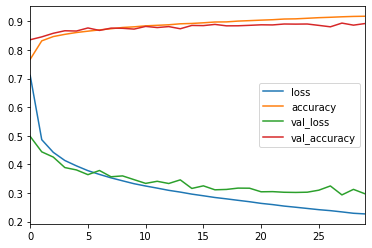

In [16]:
import pandas as pd

# The history can be plotted to observe the accuracy and loss over time
pd.DataFrame(history.history).plot()